In [240]:
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision.models as models
import torchvision.transforms as transforms

- 下面代码,加载一个预先在ImageNet 上训练好的34层残差网络
  - pretrained=True: 表示网络参数是在ImageNet 上预训练的
  - pretrained=False: 表示网络参数是随机初始化的

In [241]:
model = models.resnet34(pretrained=True)


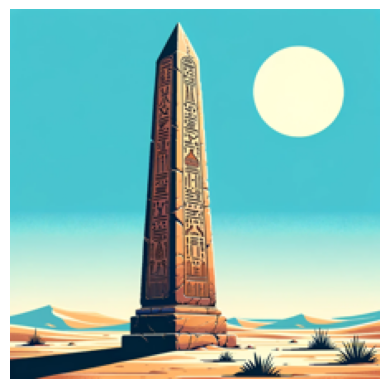

In [242]:
from PIL import Image
img = Image.open('OBELISK.png').resize((224, 224))
img_np = np.asarray(img).astype(np.float32)/255
plt.imshow(img_np);plt.axis('off')
img_th = transforms.ToTensor()(img)

In [243]:


img_th = transforms.ToTensor()(img)
print("Transformed image shape:", img_th.shape)  # 打印转换后的图像形状



Transformed image shape: torch.Size([4, 224, 224])


In [244]:
if img_th.shape[0] == 4:  # 如果是带透明度的四通道图像
    img_th = img_th[:3, :, :]  # 只取前三个通道


In [245]:
img_th.shape

torch.Size([3, 224, 224])

In [246]:
img_th.type(),img_th.max() 

('torch.FloatTensor', tensor(1.))

- 图片预处理
  - 所有预训练模型的输入图片，每个像素的值必须在[0,1]之间,再用mean = [0.484,0.456,0.406]和std = [0.229,0.224,0.225]做归一化。下面我们把这个归一化过程抽象成一个Layer,方便后面使用

In [247]:
# 定义归一化接口
class Normalize(nn.Module):
    def __init__(self,device =torch.device('cpu')):
        super(Normalize, self).__init__()
        self.mean = torch.tensor([0.485, 0.456, 0.406],device=device).view(1,3,1,1)
        self.std = torch.tensor([0.229, 0.224, 0.225],device=device).view(1,3,1,1)
        
    def forward(self, x):
        if x.ndimension() == 3:
            x = x.unsqueeze(0)
        o = (x - self.mean)/self.std 
        return o

In [248]:
img_th = img_th.unsqueeze(0) if img_th.ndimension() == 3 else img_th

- 分类图片
  - 如果模型使用了batch normalization 或者 dropout,我们要区别训练和推断的不同。

In [249]:
# 下面这个网络,不需要再考虑输入的归一化
net = nn.Sequential(Normalize(), model)
net.eval()

# 网络的直接输出并不是概率，而是logit 
logit = net(img_th)
probs = F.softmax(logit, dim=1).squeeze().data.numpy()

In [250]:
import json

with open('imagenet_class_index.json','rb') as f:
    class_idx = json.load(f)

预测的类别是: 682


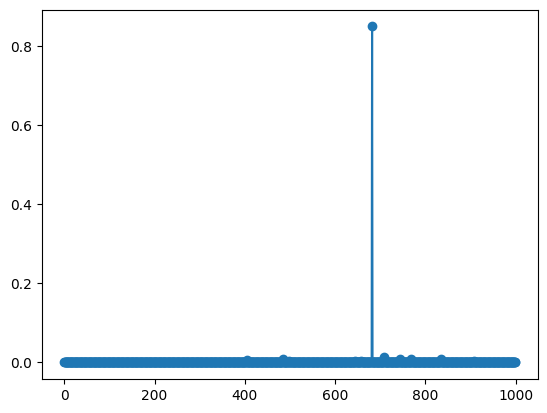

In [251]:
plt.plot(probs,'-o')

idx = np.argmax(probs)
print('预测的类别是:',idx)

In [252]:
class_idx[str(idx)]

['n03837869', 'obelisk']